# Transfer Learning with TensorFlow Hub 
## Text Classification - Sentiment Analysis on IMDB Movie Reviews

This notebook shows an example of how to use text embeddings from TensorFlow Hub for text classification on IMDB movie reviews.


In [0]:
# Enable TensorFlow 2.0
%tensorflow_version 2.x

In [2]:
# Import Tensorflow
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [3]:
# Import TensorFlow Hub
import tensorflow_hub as hub
print("Hub version: ", hub.__version__)

Hub version:  0.8.0


In [0]:
# Import TensorFlow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Import Numpy
import numpy as np
import matplotlib.pyplot as plt

## Data pipeline

### Load the dataset

In [0]:
# Split the training set into 60% (for training) and 40% (for validation)
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

### Explore the dataset

In [9]:
# Take a look at the texts of a few of the movie reviews
train_examples_batch, train_labels_batch = next(iter(train_data.batch(4)))
train_examples_batch

<tf.Tensor: shape=(4,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [10]:
# Take a look at a few of the labels of the movie reviews
train_labels_batch

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 0, 0, 1])>

## Training


### Create the model

In [11]:
# Create embedding layer with a TensoorFlow Hub pretained model
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:5]) # Note: each of the embedding vectors is 20-dimensional

<tf.Tensor: shape=(4, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064],
       [ 1.5165    , -0.71034056,  1.8556767 , -1.2033532 , -1.3105817 ,

In [0]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [0]:
# Set training parameters
NUM_EPOCHS = 20

In [0]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=NUM_EPOCHS,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 111ms/step - loss: 0.9526 - accuracy: 0.5023 - val_loss: 0.7456 - val_accuracy: 0.5211
Epoch 2/20
30/30 [==============================] - 3s 104ms/step - loss: 0.6854 - accuracy: 0.5718 - val_loss: 0.6539 - val_accuracy: 0.6220
Epoch 3/20
30/30 [==============================] - 3s 105ms/step - loss: 0.6133 - accuracy: 0.6443 - val_loss: 0.5963 - val_accuracy: 0.6553
Epoch 4/20
30/30 [==============================] - 3s 107ms/step - loss: 0.5637 - accuracy: 0.6884 - val_loss: 0.5551 - val_accuracy: 0.7015
Epoch 5/20
30/30 [==============================] - 3s 106ms/step - loss: 0.5217 - accuracy: 0.7214 - val_loss: 0.5208 - val_accuracy: 0.7387
Epoch 6/20
30/30 [==============================] - 3s 107ms/step - loss: 0.4836 - accuracy: 0.7598 - val_loss: 0.4870 - val_accuracy: 0.7493
Epoch 7/20
30/30 [==============================] - 3s 107ms/step - loss: 0.4449 - accuracy: 0.7849 - val_loss: 0.4564 - val_accuracy: 0.7749
Epoch 

In [0]:
# Display training curves
def display_training_curves(history, title):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(NUM_EPOCHS)

  plt.plot(epochs_range, acc, label='Train accuracy')
  plt.plot(epochs_range, val_acc, label='Val accuracy')
  plt.title(title)
  plt.legend(loc='upper left')
  plt.figure()

  plt.show()

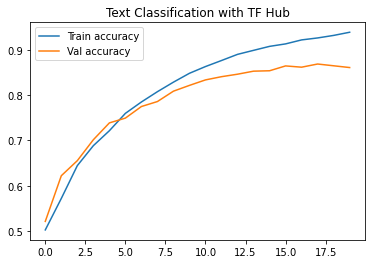

<Figure size 432x288 with 0 Axes>

In [0]:
# Display training curve 
display_training_curves(history, "Text Classification with TF Hub")

In [0]:
### Evaluate the model

In [0]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 3s - loss: 0.3168 - accuracy: 0.8495
loss: 0.317
accuracy: 0.850
